# Quiz 5: Simple Linear Regression
We'll use a data set of houses sold in King County from May 2014 to May 2015, described [here](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/). The available attributes are:
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 - has an average level of construction and design, and 11-13 have a high quality level of - construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In this notebook you will do the following:
1. Perform a preliminary exploration of the data both through visualization and the computation of basic statistics.
2. Build simple regression models using both the closed form solution and gradient descent. You will also verify your answers with scikit-learn.

You will be provided with some already completed code as well as some code that you should complete yourself in order to answer various questions. 

Please answer all ***questions*** in the space provided in this notebook. Use markdown cells for the questions that do not require code, code cells for those that do, and code cells with Python comments for the ones that require both code and an explanation. Avoid looping over the entire dataset. 

As usual, we start by importing a few libraries. We also set some environment options and find basic information about the system we are using, working directory, and library versions.

In [1]:
import platform, os
print('Python',platform.python_version())
print(platform.system(),os.getcwd())

# Use full canvas width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
np.set_printoptions(precision=2,suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# Let's change the default font size in the resource configuration. Note the dictionary interface.
matplotlib.rcParams.update({'font.size': 18}) 

# Show all columns when we call a Pandas dataframe
pd.set_option('display.max_columns', None)
import numpy as np
print(f'Using NumPy {np.__version__}')

Python 3.11.0
Windows C:\Users\siddh\OneDrive\Desktop


Using NumPy 1.23.5


## Load house sales data
We store the data about house sales in a Pandas dataframe.

In [2]:
cwd_ = os.getcwd()
sales = pd.read_csv(f'{cwd_}/home_data.gz')

### Explore the data

Let's find out how much data we have and take a look at the series available in the sales dataframe. Take a moment to examine the type of data available in each column.

In [3]:
N = len(sales)
print(f'There are N={N} records')

There are N=21613 records


In [4]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.511234,-122.256775,1340.0,5650.0
1,6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.721023,-122.318862,1690.0,7639.0
2,5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.737927,-122.233196,2720.0,8062.0
3,2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.520820,-122.393185,1360.0,5000.0
4,1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,1987.0,0.0,98074,47.616812,-122.044901,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21 00:00:00+00:00,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8.0,1530.0,0.0,2009.0,0.0,98103,47.699285,-122.346105,1530.0,1509.0
21609,6600060120,2015-02-23 00:00:00+00:00,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8.0,2310.0,0.0,2014.0,0.0,98146,47.510733,-122.361867,1830.0,7200.0
21610,1523300141,2014-06-23 00:00:00+00:00,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7.0,1020.0,0.0,2009.0,0.0,98144,47.594358,-122.298654,1020.0,2007.0
21611,291310100,2015-01-16 00:00:00+00:00,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8.0,1600.0,0.0,2004.0,0.0,98027,47.534499,-122.069087,1410.0,1287.0


Pandas dataframes inherit matplotlib functionality for easy plotting. Here we create histograms for some of the columns.

In [5]:
def show_features(dataframe, features):
    """Plots columns given by features in the dataframe as histograms."""
    
    column_num = len(features)

    fig, ax = plt.subplots(column_num, 1, figsize=(14.0, 8.0*column_num), frameon=False)
    
    if column_num == 1: ax = [ax]

    for i in range(column_num):
        # Go through each column of the dataframe and plot the data as a histogram

        column_label = features[i]

        # bin number is minimum of 60 and the number of unique values in the column
        bin_num = min(dataframe[column_label].nunique(), 60)

        dataframe[column_label].hist(ax=ax[i], bins=bin_num)

        # Include a table at the right showing statistics for the data
        pd.plotting.table(ax[i], dataframe[column_label].describe(), loc='right', bbox = [1.1, 0.5, 0.25, 0.5])

        ax[i].set_xlabel(column_label)
        ax[i].set_ylabel('count')
        ax[i].margins(0, 0.1)

    plt.show()
    
    return

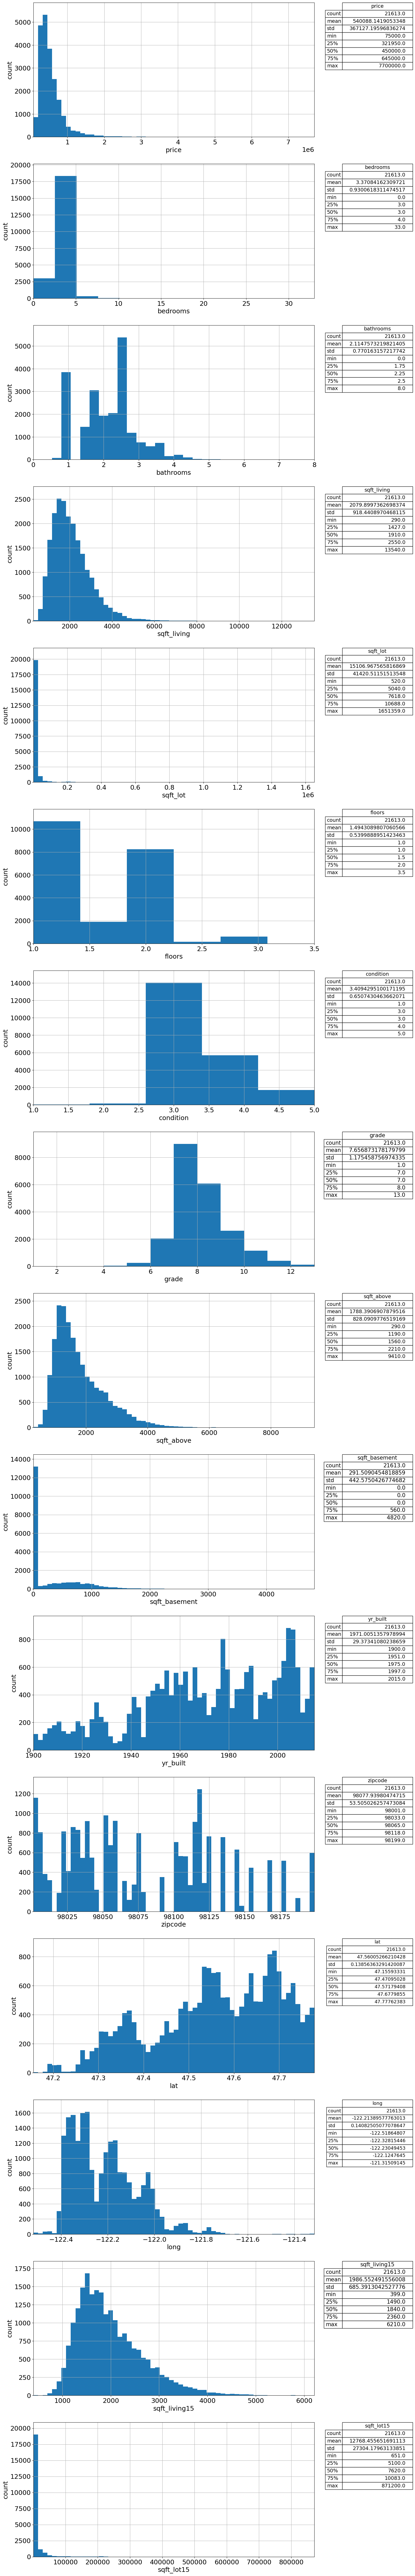

In [6]:
# We'll show histograms for some of the following features
feature_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
show_features(sales, feature_list)

***Question 1***. Among the features examined, which two features appear to most closely follow a normal distribution? Which two appear to deviate the most from a normal distribution?

a. sqft_living15 and grade \
b. zipcode and bathrooms

***Question 2.***
How many entries are there for the house with id 795000620 on the whole data set? Interpret this result. What does it mean with respect to the regression model of the *ground truth*?

In [7]:
len(sales[sales['id'] == 795000620])

3

This says that there can be 3 different outputs for the same house. From this, we can say that the id has no relationship with the ground truth as each time the house sold at a different price, meaning there are other factors affecting the sale price of the house.

#### Plot price as a function of square feet.

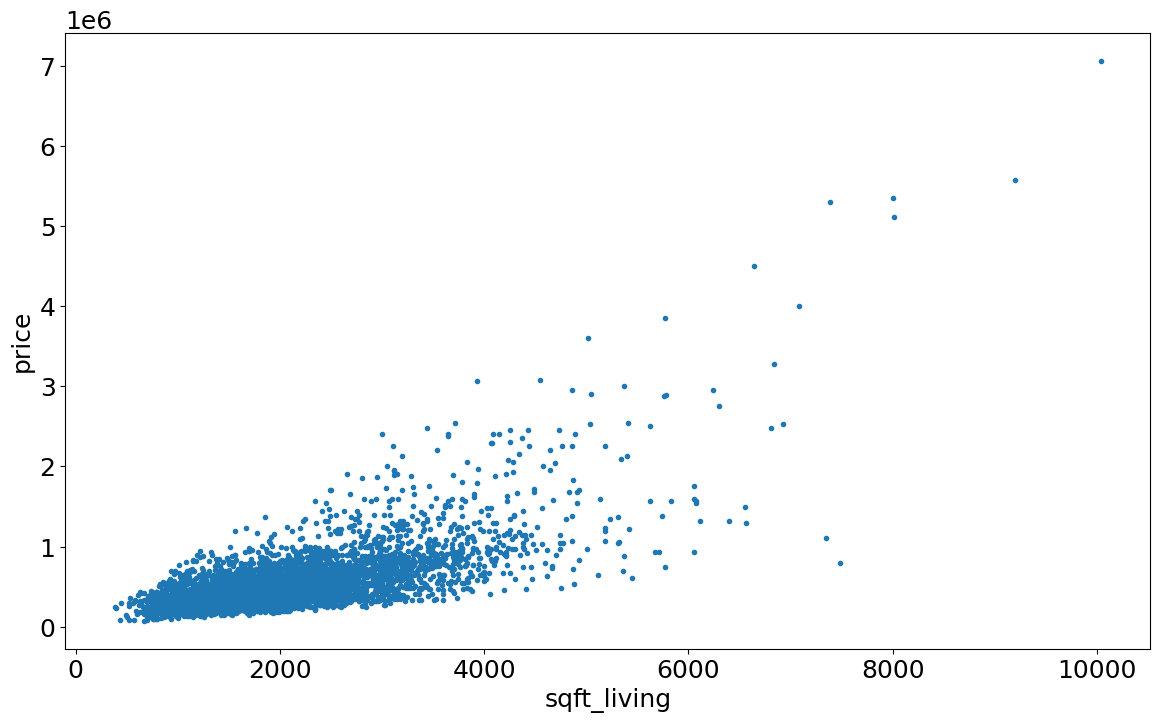

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14.0, 8.0), frameon=False)
ax.plot(sales[1:5000]['sqft_living'], sales[1:5000]['price'], '.')
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.show()

## Simple regression models.
In this section we will use data on house sales in King County to predict house prices using *simple linear regression* (i.e., one regressor only). 

You will:
* Use pandas functions for DataFrames and Series in order to compute summary statistics
* Write a generic function to compute the simple linear regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Write a function to compute the mean squared error (MSE) of a model
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices

We will sometimes use some built-in functions for pandas Series. Recall that Pandas Series are basically one-dimensional ndarrays with axis labels. Make sure you know how to do the following:
* Compute the sum of a Pandas Series
* Compute the arithmetic average (mean) of a Pandas Series
* MultiplyPandas Series by constants
* Multiply pandas Series by other Pandas Series

***Question 3.*** Compute the average and the standard deviation of the house prices in the entire set sales.

Extract the prices into a series called `prices`.
Compute the average price and standard deviation without built-in functions for mean and standard deviation, and without any explicit loops, on the entire data set. In other words, do your computation using Series/vector operations and adding the entries of a vector with `.sum()`. See slide 80 of Set 1 for the formulas to use. Report your values with 2 decimal places of precision.
Recompute the mean and standard deviation using Pandas built-in functions. Make sure the two sets of values match.

In [9]:
prices = sales['price']
avg = round((sum(prices)/len(prices)), 2)
std = ((((prices - avg)**2).sum()/len(prices))**(1/2)).round(2)

## Simple regression models.
In this section we will use data on house sales in King County to predict house prices using *simple linear regression* (i.e., one regressor only). 

You will:
* Write a generic function to compute the simple linear regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Write a function to compute the mean squared error (MSE) of a model
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices

We will need both a training set and a testing set. Let's do an 80-20 split.b

In [10]:
train_set = sales.sample(frac=0.8, random_state=0)
test_set = sales.drop(train_set.index) # We don't want any training samples in the test set!

### Build generic simple linear regression functions.

In this section, we a regression model using different algorithms covered in class. First, we find the closed-form solution with matrices and verify the answer with Scikit-learn. Second, we build a similar model using gradient descent.

***Question 4.*** Without using explicit loops, complete the following function to compute a simple linear regression model (i.e., $d=1$). All arguments are given as Pandas series. Your solution should return a tuple $\mathbf{w}$ consising of the slope and intercept of a model built on data stored in two Pandas Series: `in_feature` (our only regressor) and `target` (the true response values).

In [11]:
# YOUR CODE HERE
def simple_linear_regression1(in_feature, target):
    '''in_feature: a Pandas series storing the values of the regressor
       target: a Pandas series storing the true values
       Returns: the learned model w=(intercept,slope) using the matrix-based closed-form solution'''
    d = {'y': target, 'x': in_feature}
    data = pd.DataFrame(data = d)
    
    y = data["y"]
    del data["y"]
    
    data.insert(0, "bias", 1)
    
    linReg = data.to_numpy()
    w = np.linalg.inv(linReg.T@linReg)@(linReg.T@y)
    w = w.round(2)
    return w

You can test your function using data whose answer we know. Let's do this by generating points on a line $y=2+3x$. Thus, we know that the intercept should be 2 and the slope should be 3.

In [12]:
check_feature = pd.Series(range(5))
check_output = pd.Series(2 + 3*check_feature)
(check_intercept, check_slope) =  simple_linear_regression1(check_feature, check_output)
print("Intercept: " + str(check_intercept))
print("Slope: " + str(check_slope))

Intercept: 2.0
Slope: 3.0


Now that we believe our function is working correctly, let's build a closed form regression model for predicting `price` based on `sqft_living`. Rembember that this must happen on train_data only!

***Question 5.*** Compute the weights `w1` of a simple regression model for predicting house price as a function of square feet of living area using your closed-form solution. 

In [13]:
w1 = simple_linear_regression1(train_set['sqft_living'], train_set['price'])
w1

array([-46927.77,    282.34])

Let's recompute the regression model but this time using the scikit-learn regression algorithm.

***Question 6.*** Write a function `simple_linear_regression2(in_feature, target)` that takes in two Pandas series, the regressor and the target, and returns a simple linear regression model w=(intercept,slope) built using Scikit-learn.
Compare the resulting model with the one built in Question 5 and make sure they coincide.

In [14]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

def simple_linear_regression2(in_feature, target):
    '''in_feature: a Pandas series storing the values of the regressor
       target: a Pandas series storing the true response values
       Returns: the learned model as a tuple (intercept,slope)'''
    linear_model = LinearRegression() # Instantiate and initialize a linear regression model\
    X=in_feature.reshape(-1, 1) # only the true features are needed
    linear_model.fit(X,target)
    return (linear_model.intercept_, linear_model.coef_[0])

w2 = simple_linear_regression2(train_set['sqft_living'].to_numpy(), train_set['price'].to_numpy())
print(f'Sklearn model: {w2[0]:.2f} + {w2[1]:.2f}x')

Sklearn model: -46927.77 + 282.34x


### Gradient descent.
Now you get to implement gradient descent for the case of one regressor variable (e.g., square feet of living area). Given a starting vector, you will update the current weights by moving in the direction opposite to the gradient in order to minimize your cost function.

The amount by which we move is called the 'learning rate', denoted by $\alpha$. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the norm (length) of the gradient vector be smaller than a fixed tolerance threshold.

In order to perform gradient descent, we will need the $N\times 2$ design matrix $X$. Recall that $X$ consists of a column of ones and a column with the chosen feature values.

***Question 7.*** Complete the function `series2matrix(series, target)` 
that accepts a Pandas series (e.g. train_set['sqft_living']) , and a target Pandas series e.g. (train_set['price']) and returns a tuple $(X, y)$ consisting of:
- An $N\times 2$ NumPy matrix $X$ whose columns include a constant column of 1s followed by column for the desired feature, for all $N$ rows of `series`.
- A NumPy array $y$ containing the values of `target`.

In [15]:
# YOUR CODE HERE
def series2matrix(series, target):
    y = target
    
    data = pd.DataFrame(data = {'x': series})
    data.insert(0, "bias", 1)
    
    X = data.to_numpy()
    
    return (X, y)

In [16]:
# Let's test your function
X,y=series2matrix(train_set['sqft_living'],train_set['price'])
print('Dimensions:',X.shape, y.shape,'\n')
print(X[:3], '\n...\n', y[:3], '...')

Dimensions: (17290, 2) (17290,) 

[[   1. 1430.]
 [   1. 4670.]
 [   1. 1440.]] 
...
 17384     297000.0
722      1578000.0
2680      562100.0
Name: price, dtype: float64 ...


We will need to make predictions from a model $\mathbf{w}$ and a design matrix $X$. This can be done with $X\cdot\mathbf{w}$, as discussed in class.

In [17]:
def predict(X, w):
    '''X: a matrix whose rows store the tall vectors of the regressor
       w: the model, a tuple with w[0]=intercept and w[1]=slope
       Returns: a vector with the predicted values'''
    w = np.array(w)
    return np.dot(X,w)

Our measure of cost will be the mean-squared-error (MSE).

***Question 8.*** Complete the function `MSE(y,yhat)` that takes in two NumPy arrays corresponding to the true response and the predicted values and returns their MSE.

In [18]:
# YOUR CODE HERE
def MSE(y,yhat):
    '''y: NumPy array storing the response values
       yhat: Numpy array storing the predicted values
       Returns: the MSE'''
    return np.dot(y - yhat, y - yhat)/len(y)

Let's test your function by computing the MSE of your closed-form solution.

In [19]:
yhat = predict(X, w1)
print(f'{MSE(y,yhat):.5e}')

6.96080e+10


***Question 9.*** Complete the function 
`simple_linear_regression3(X, y, w0, alpha, tolerance, MAX_ITER=25E6)` given below. You may want to monitor progress by printing the cost every few iterations.

In [48]:
# YOUR CODE HERE
from math import sqrt

def simple_linear_regression3(X, y, initial_w, alpha, tolerance, MAX_ITER=5E7):
    '''X: a NumPy array storing the design matrix
       y: a NumPy array storing the true response values
       initial_w: a tuple (intercept,slope) storing our initial guess
       alpha: a float storing the learning rate
       tolerance: a float storing our stopping criterion
       MAX_ITER: maximum number of epochs'''
    
    w = initial_w
    k = 0
    p = np.array([10, 10])
    while k < MAX_ITER and np.linalg.norm(p) > tolerance:
        y_hat = predict(X, w)
        cost = MSE(y, y_hat)
        p = -2*(np.dot(X.T, y - y_hat))/len(y)
        w = w - (alpha * p)
        k+=1
    return w, k

Gradient descent is an iterative improvement algorithm whose running time depends on many factors, including initial feasible solution, learning rate, tolerance, etc. As such, unless you carefully choose values for the relevant hyperparameters, you can expect it to run much more slowly than a closed-form solution. The reason for its popularity is that for most learning algorithms \emph{there is no closed form solution.} In the next question your goal is to use gradient descent to match the solutions found in closed-form (and also by Scikit-learn). 

One of the key factors is the initial guess for $\mathbf{w}$. Here, domain-specific knowledge can help you choose a good starting value. For example, you may know that the price per square-foot is at least \\$100 even though you have no idea what to use for intercept, since 0 square feet of living area does not make sense for your model (never extrapolate outside of the training ranges!). Accordingly, you may use $(0,100)$ as your initial weight guess. We will, instead, take advange of our training data. Two obvious choices for $\mathbf{w}$ are the line $\ell_1$ through the cheapest and most expensive houses, or the line $\ell_2$ through the smallest and largest houses. Since it is not clear which of the two is the better choice we will average them out. Let $\ell_1$ go through $p_1$ and $p_2$ and $\ell_2$ be incident on $q_1$ and $q_2$. Our initial vector of weights then will be the line $\ell$ through the midpoint of $p_1$ and $q_1$ and through the midpoint pof $p_2$ and $q_2$.

***Question 10.*** Write code to find the intercept and slope of line $\ell$, to serve as initial guess. Print this initial weight vector with 2 decimal places.

In [49]:
# YOUR CODE HERE
def find_line(t):
    p1 = t.loc[t['price'].idxmin()]
    p2 = t.loc[t['price'].idxmax()]

    s1 = (p2['price'] - p1['price'])/(p2['sqft_living'] - p1['sqft_living'])
    i1 = p1['price'] - s1 * p1['sqft_living']

    q1 = t.loc[t['sqft_living'].idxmin()]
    q2 = t.loc[t['sqft_living'].idxmax()]

    s2 = (q2['price'] - q1['price'])/(q2['sqft_living'] - q1['sqft_living'])
    i2 = q1['price'] - s2 * q1['sqft_living']

    s_ = (s1 + s2)/2
    i_ = (i1 + i2)/2
    
    return (s_, i_)

***Question 11.*** Using $\ell$ as initial guess, find values of the learning rate $\alpha$, tolerance $\tau$, and number of iterations that suffice so that your gradient descent function finds a model whose cost is within 5% of the optimal. Print the final weight vector, cost, as well as the chosen values of $\alpha$, $\tau$, and number of iterations used. This will require some experimentation on your part.

In [62]:
# YOUR CODE HERE'
y = train_set['price']
x = train_set['sqft_living']
X, y = series2matrix(x, y)
initial_w = find_line(train_set)
alpha = 0.0000001
tolerance = 10
MAX_ITER = 10000
w3, n_ = simple_linear_regression3(X, y, initial_w, alpha, tolerance, MAX_ITER)
w3, n_

(array([426.68, 263.31]), 10000)

## Evaluate the quality of our model

Let's start by finding some basic statistics. the average house price in the test set. 

***Question 12.*** Write code to to find the average house price, as well as the average unsigned error, and the RMSE incurred by the optimal model, all computed on the test data. Remember that the unsigned error of a sample is the absolute value of the difference between predicted and true prices.

In [36]:
# YOUR CODE HERE
import math
y = test_set['price']
x = test_set['sqft_living']
X, y = series2matrix(x, y)
avg = np.mean(test_set['price'])
err = np.mean(abs(y - predict(X, w1)))
rsme = math.sqrt(MSE(y, predict(X, w1)))
avg, err, rsme

(537445.2179042331, 172271.9158292852, 251670.09926203144)

***Question 13.*** Make a scatter plot of the test data with both the learned optimal model and the one computed with gradient descent superimposed. Use red for the optimal and blue for the gradient descent one.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


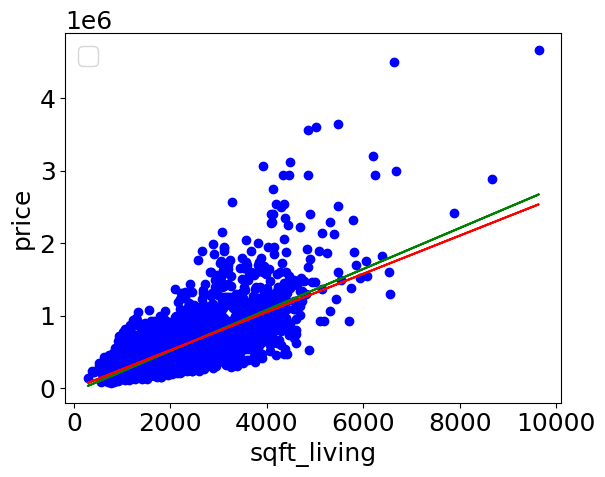

In [66]:
plt.scatter(test_set['sqft_living'], test_set['price'], color='blue')

optimal_pred_price = w1[0] + w1[1] * test_set['sqft_living']
plt.plot(test_set['sqft_living'], optimal_pred_price, color='green')

grad_pred_price = w3[0] + w3[1] * test_set['sqft_living']
plt.plot(test_set['sqft_living'], grad_pred_price, color='red')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

As the saying goes, the three most important things in real state are location, location, and location, meaning that identical homes can increase or decrease in value due to their location location. Let's visualize ranges of house prices as a function of zipcode.

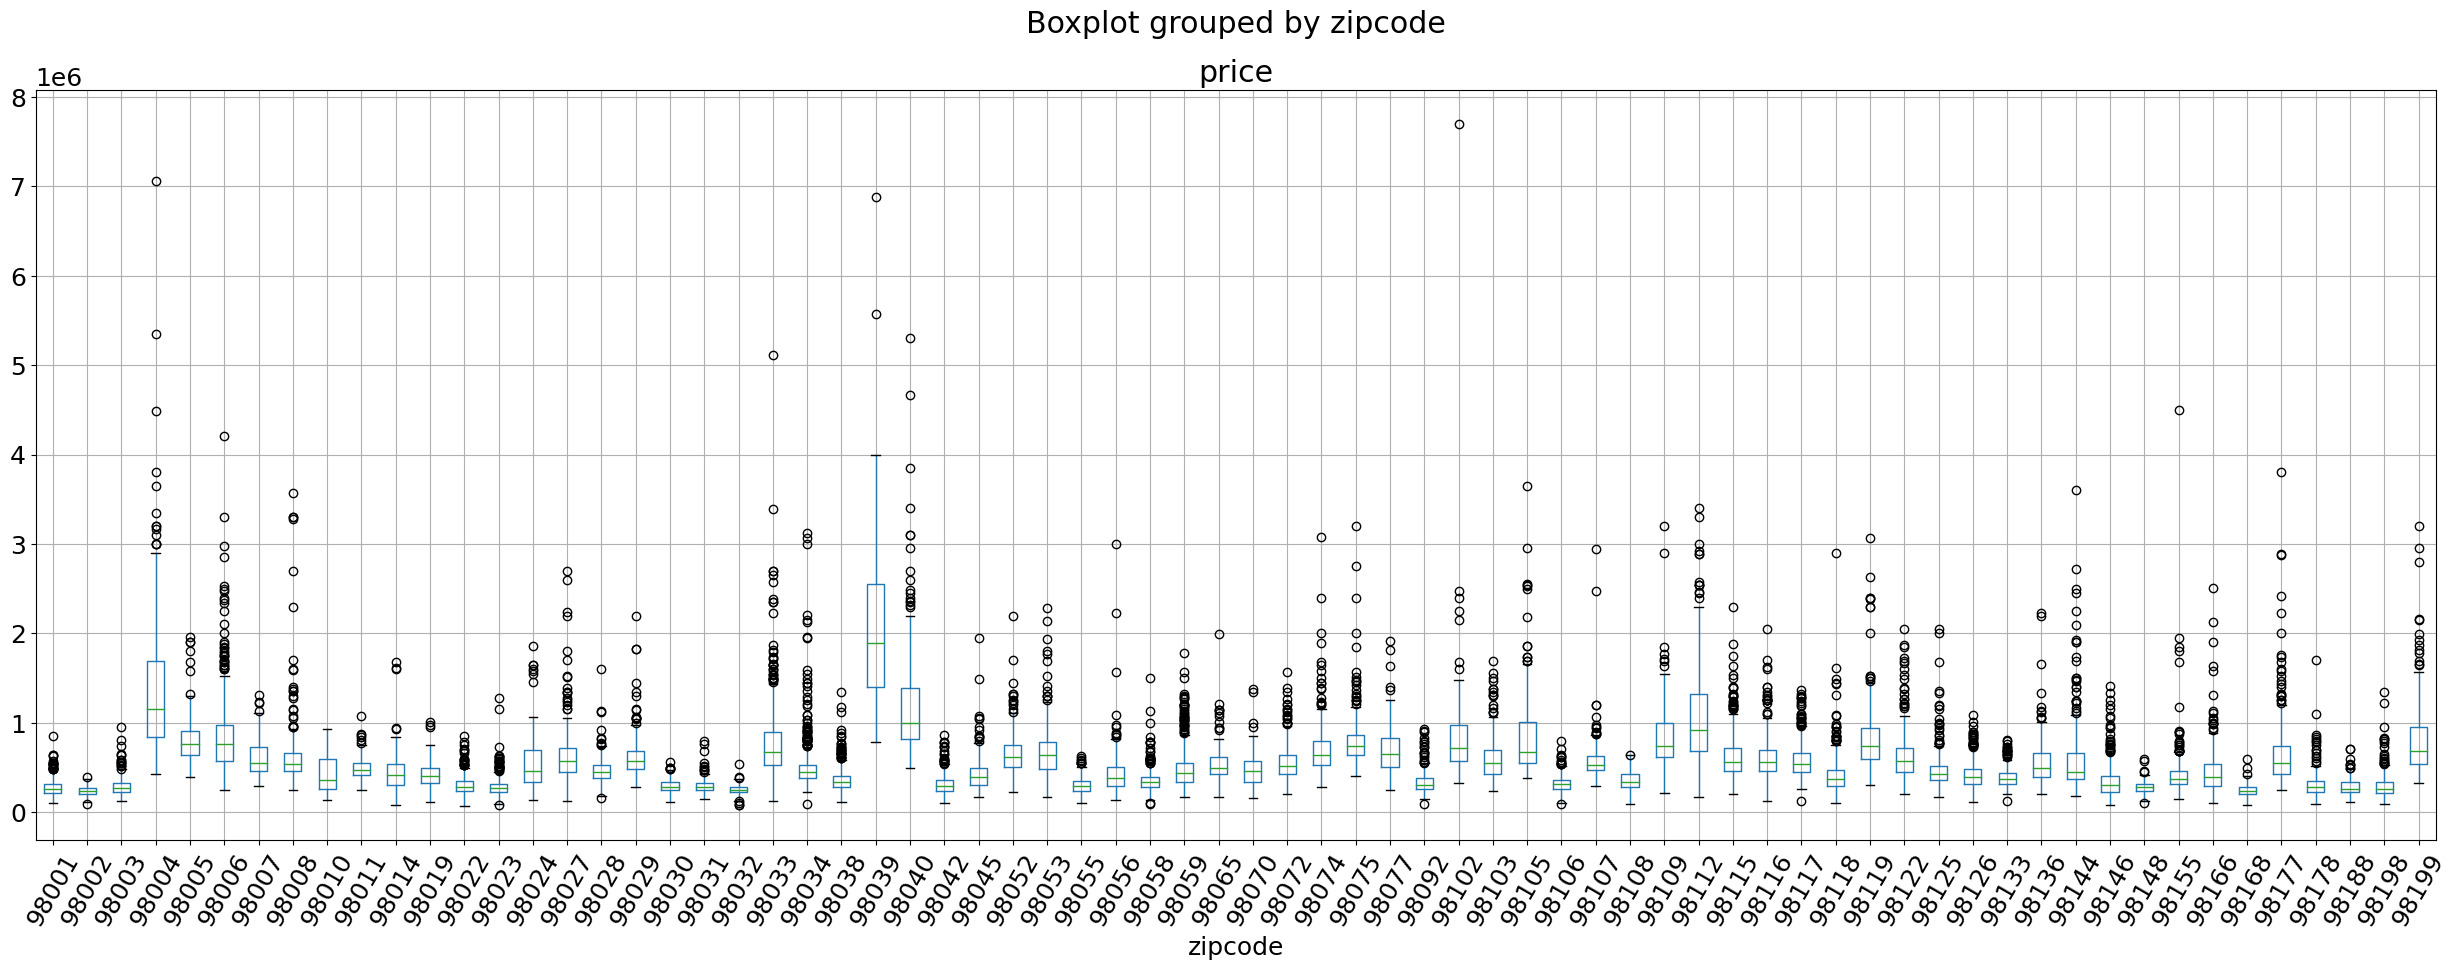

In [25]:
# Show how price depends on zipcode
fig, ax = plt.subplots(1, 1, figsize=(30.0, 10.0), frameon=False)
sales.boxplot('price', ax=ax, by='zipcode', rot=60, fontsize=18)
plt.show()

***Question 14.*** Based on the above box-wisker plot, what is the most expensive zip code, as determined by the median sale price?

98039


Let's check actual and predicted prices on a couple of houses, a modest one (ID=5309101200) and a fancy one (ID=1925069082).

In [ ]:
house1 = sales[sales['id']==5309101200]
house1

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [ ]:
house2 = sales[sales['id']==1925069082]
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg" width="59%">

***Question 15.*** For each of the two houses use code to extract the actual price, the predicted price, and the signed error (predicted $-$ actual).

In [60]:
# YOUR CODE HERE
price1 = sales[sales['id']==5309101200]['price']
price2 = sales[sales['id']==1925069082]['price']
pred_price1 = w1[0] + w1[1] * sales[sales['id']==5309101200]['sqft_living']
pred_price2 = w1[0] + w1[1] * sales[sales['id']==1925069082]['sqft_living']
se1 = pred_price1 - price1
se2 = pred_price2 - price2
se1, se2

(1054    10688.23
 dtype: float64,
 1361   -936870.17
 dtype: float64)

***Question 16.*** We are doing worse than we would like. What are some of the decisions we made that are the cause of poor performance? Write a short paragraph commenting on the bias and variance of the model (be specific). Provide a detailed description and justification for a better (but still succinct) model that you would try instead.  You do not need to implement this model.

**Answer 16 here.**